In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def plot_decision_boundary_keras(clf, X, Y, h=0.01, strict=False):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    Z_strict = Z >= 0.5

    plt.figure(figsize=(15, 15))
    if strict:
        plt.contourf(xx, yy, Z_strict, cmap=plt.cm.Blues, alpha=0.8);
    else:
        plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.8);
        
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.autumn);
    plt.title('Decision boundary');

In [4]:
def generate_dataset():
    ps = []
    for a in np.linspace(0, 2*np.pi, 1000):
        if (0.75*np.pi - 0.2) < a < (0.75*np.pi + 0.2):
            continue
        if (7.0*np.pi/4.0 - 0.2) < a < (7.0*np.pi/4.0 + 0.2):
            continue
        if (5.0*np.pi/4.0 - 0.2) < a < (5.0*np.pi/4.0 + 0.2):
            continue
        r = 1 + (np.random.rand()-0.5)*0.5
        x = np.cos(a)*r
        y = np.sin(a)*r
        ps.append([x,y])
    ps = np.array(ps)

    xs = np.linspace(-1.5, 1.5, 200)
    xs = xs + (np.random.rand(len(xs)) - 0.5)/10.0
    ys = -xs + (np.random.rand(len(xs)) - 0.5)/3.0

    xs2 = np.linspace(-1.5, -0.1, 200)
    xs2 = xs2 + (np.random.rand(len(xs2)) - 0.5)/10.0
    ys2 = xs2 + (np.random.rand(len(xs2)) - 0.5)/3.0

    ps2 = np.vstack([np.array([xs, ys]).T, 
                     np.array([xs2, ys2]).T])

    X = np.vstack([ps, ps2])
    y = np.array([0]*ps.shape[0] + [1]*ps2.shape[0])

    return X, y

In [5]:
X, y = generate_dataset()

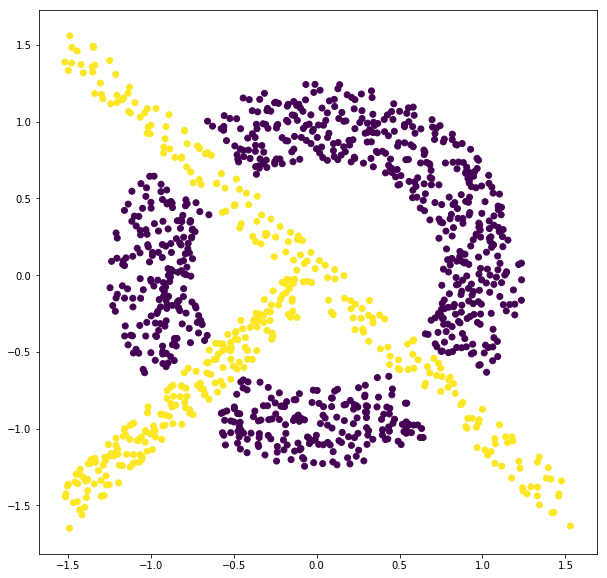

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Своя нейронная сеть</h3> 
    </div>
</div>

In [7]:
from keras.models import Sequential
from keras.layers import Dense

from livelossplot import PlotLossesKeras

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Добавьте в модель несколько полносвязных (`keras.layers.Dense`) слоёв. Определите оптимальное количество. Попробуйте использовать различные функции активации (`sigmoid`, `relu`, ..) и посмотрите, что будет получаться.

In [8]:
# Твой код здесь 
model = Sequential([
    Dense(8, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


Подберите оптимальный размер батча, количество эпох и оптимайзер. Размер батча будет влиять на скорость обучения. Количество эпох должно быть достаточным для того, чтобы лосс перестал падать. Добейтесь того, чтобы две фигуры на изображении разделялись нейронной сетью. 

In [10]:
batch_size = 32
epochs = 400

In [11]:
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X, y, 
          batch_size=batch_size, epochs=epochs, 
          verbose=0, callbacks=[PlotLossesKeras()])

KeyboardInterrupt: 

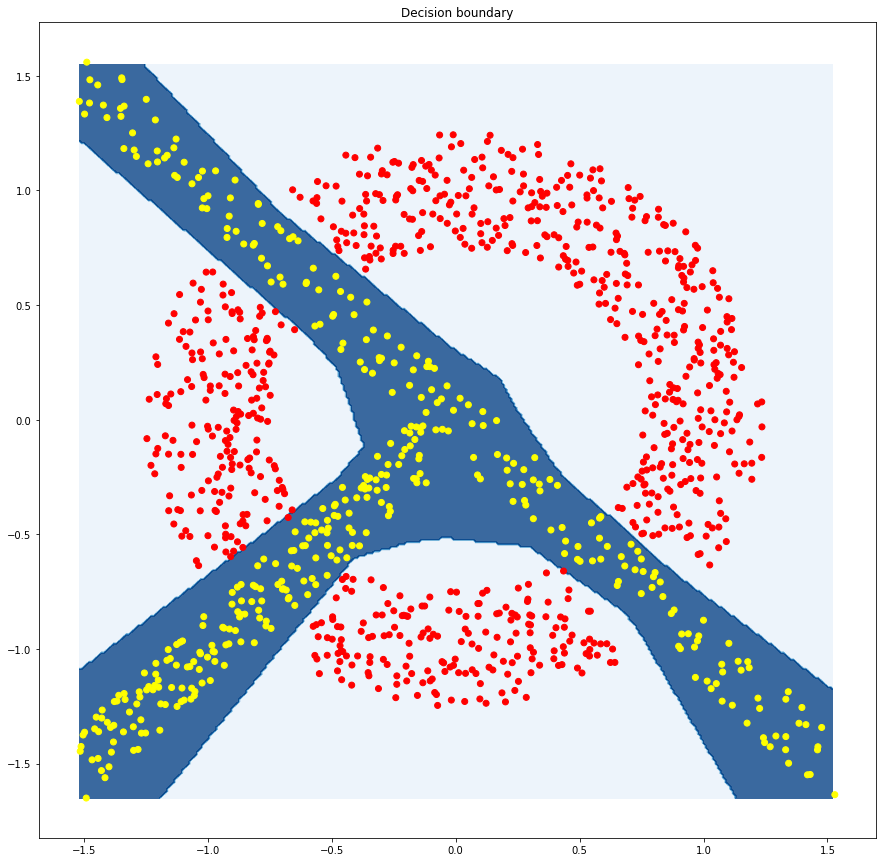

In [13]:
plot_decision_boundary_keras(model, X, y, strict=True)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Оптимайзер</h3> 
    </div>
</div>

In [14]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [15]:
# Твой код здесь
# Функция создания нейронной сети, с параметрами, найденными выше
def create_model():
    return  Sequential([
    Dense(6, activation='relu', input_shape=(2,)),
    Dense(6, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

Используя оптимайзер SGD, необходимо вручную подбирать параметр learning_rate(lr). Обычно он принимает значение от 1е-5 до 1е-1. Подберите оптимальное значение lr для конкретной нейронной сети.

In [16]:
batch_size = 32
epochs = 100

In [17]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
hists = []

for lr in learning_rates:
    optimizer = SGD(lr)
    model = create_model() # пересоздаем заново
    model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    hist = model.fit(X, y, batch_size=32, epochs=epochs, verbose=0)
    hists.append(hist)

In [18]:
accuracys = [h.history['acc'] for h in hists]

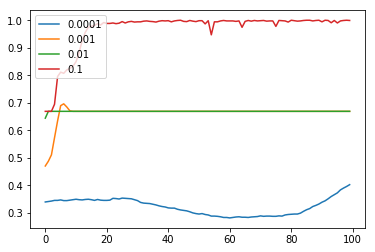

In [19]:
for acc, l in zip(accuracys, learning_rates):
    plt.plot(acc, label=l)
plt.legend()

**Наилучший оптимайзер**: *ответ*

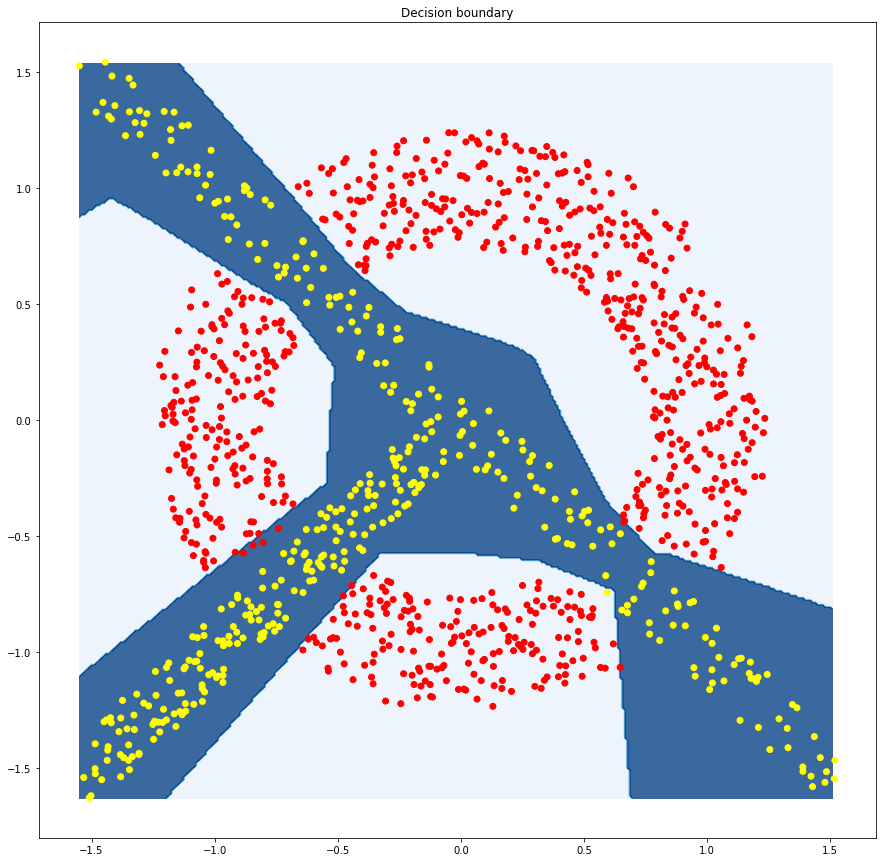

In [57]:
plot_decision_boundary_keras(model, X, y, strict=True)

Также можно подбирать параметр momentum, который поможет не застрять в локальном минимуме. Но если нет времени подбирать параметры SGD, то достаточно использовать оптимайзер Adam - он адаптивно подбирает lr сам. От выбранного оптимайзера будет зависеть скорость сходимости и минимально достижимое значение ошибки. Список доступных оптимайзеров в keras - https://keras.io/optimizers/

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Инициализация весов</h3> 
    </div>
</div>

После создания архитектуры и перед началом обучения нейронной сети её веса необходимо как то инициализировать, если задать все нулями, то градиенты по каждому весу будут одинаковые. Поэтмоу обычно веса инициализируют небольшими случайными значениями, а вот какими именно? От правильно выбора зависит сходимость сети и отсутсвие затухающего или взрывающегося градиента. Обычно подбирают только инициализацию весов($W$), а свободные коэффициенты($b$) инициализируют нулями.

Со списком всех возмоных инициалайзеров можно ознакомиться тут https://keras.io/initializers. Как и в предыдущем задании необходимо выбрать наилучший.

In [20]:
# Твой код здесь
# Функция создания нейронной сети, с параметрами, найденными выше
def create_model(k_init):
    return  Sequential([
    Dense(6, activation='relu', input_shape=(2,), kernel_initializer=k_init),
    Dense(6, activation='relu', kernel_initializer=k_init),
    Dense(3, activation='relu', kernel_initializer=k_init),
    Dense(1, activation='sigmoid', kernel_initializer=k_init)
])

In [21]:
batch_size = 32
epochs = 100

In [22]:
k_init = ['zeros', 'random_uniform', 'random_normal', 'glorot_uniform']
hists = []

for k in k_init:
    model = create_model(k) # пересоздаем заново
    model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
    hist = model.fit(X, y, batch_size=32, epochs=epochs, verbose=0)
    hists.append(hist)

In [84]:
accuracys = [h.history['acc'] for h in hists]

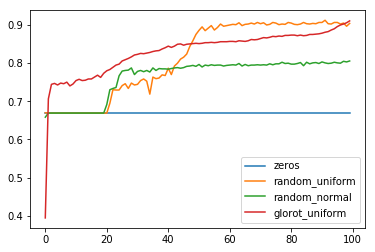

In [85]:
for acc, l in zip(accuracys, k_init):
    plt.plot(acc, label=l)
plt.legend()

**Наилучший инициалайзер**: *ответ*

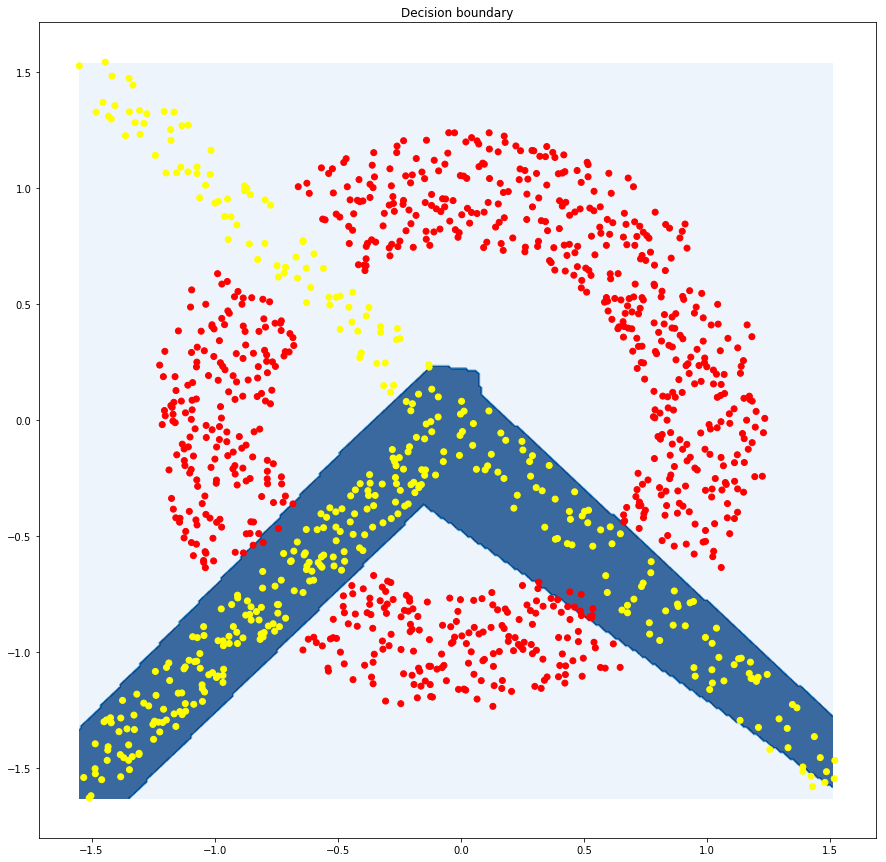

In [86]:
plot_decision_boundary_keras(model, X, y, strict=True)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 4: Callbacks</h3> 
    </div>
</div>

Колбек - функция которая выполняется после завершения эпохи или после каждого батча, с одним из них вы уже знакомы PlotLossesKeras - рисует график лосса прямо во время обучения. Попробуйте самстоятельно еще два самых полезных колбека: EarlyStopping - останавливает обучение если лосс переставает падать, ModelCheckpoint - сохраняет веса модели по мере обучения, очень полезно, когда модель фитится по несколько дней и необходимо востановить веса с какой то конкретной эпохи. Подробнее про них тут https://keras.io/callbacks/

In [23]:
import keras

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

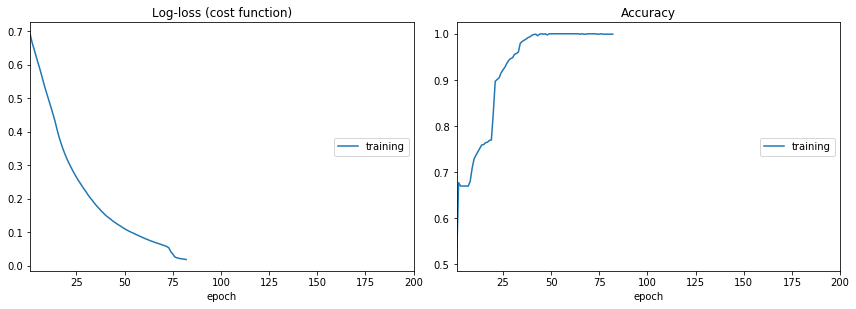

In [30]:
model = create_model('glorot_uniform')
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=200, verbose=0,
          callbacks=[PlotLossesKeras(), 
                     
                     EarlyStopping(monitor='loss', min_delta=0.005, patience=3, verbose=0),
                     
                     ModelCheckpoint('weights/w{epoch:02d}-{loss:.2f}.hdf5', 
                                     save_best_only=True,
                                     save_weights_only=True, 
                                     monitor='loss')])